In [2]:
# Import statements
# https://matplotlib.org/3.1.1/gallery/style_sheets/ggplot.html
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')
from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics.pairwise import euclidean_distances
from sklearn.cluster import KMeans
from sklearn.decomposition import PCA
from sklearn.linear_model import LinearRegression
from scipy.stats import skew
from scipy.special import boxcox1p
from sklearn.preprocessing import RobustScaler
from sklearn.linear_model import Lasso, LassoCV
from sklearn.model_selection import permutation_test_score
from sklearn.metrics import make_scorer
from sklearn import linear_model
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor
from lightgbm import LGBMRegressor
from xgboost import XGBClassifier
from scipy.cluster.hierarchy import linkage,dendrogram
plt.style.use('ggplot')

In [3]:
# Reading the Train File
data_train = pd.read_csv(r'I:\Data Science Fundamentals\Project\costello_ace_2017-2018.csv')

In [4]:
cols = data_train.columns
num_cols = data_train._get_numeric_data().columns
print(num_cols)

Index(['Unnamed: 0', 'Item was Scanned', 'Dynamic Promo ID', 'Actual Price',
       'Loyalty ID', 'Line #'],
      dtype='object')


In [5]:
list(set(cols) - set(num_cols))

['Zip Plus-4',
 'Line Item Transaction Type',
 '$ Off Retail',
 'Gross Margin %',
 'Pricing Source',
 'Fineline Code',
 'Department Code',
 'Transaction Time',
 'Net Sales Units',
 'Net Sales',
 'Promo/Discount',
 'Cost',
 'Class Code',
 'Customer Number',
 'Store #',
 'Zip Code',
 'Actual-Retail',
 'Store Name',
 'Item Number',
 'Gross Margin',
 'Receipt Number',
 'Retail Price',
 'Item Description',
 'Date',
 'Item Type',
 'Scanned UPC',
 'Return Code',
 'Clerk',
 'MIP Promo ID',
 'Tender Type',
 'Class Name',
 'Taxable',
 'Fineline Name',
 'Department Name']

In [8]:
qualitative_vals = [f for f in data_train.columns
    if data_train[f].dtypes==object]

quantitative_vals =[f for f in data_train.columns
    if data_train[f].dtypes!=object]
quant=quantitative_vals
qualt=qualitative_vals
print("quantitative:" +str(len(quant))+" "
     "qualitative:" + str(len(qualt)))

quantitative:6 qualitative:34


In [3]:
data_train.select_dtypes(include=['int', 'float']).columns

Index(['Item was Scanned', 'Actual Price', 'Loyalty ID'], dtype='object')

In [ ]:
list(set(num_cols) - set(cols))

In [ ]:
data_train.dtypes

In [ ]:
data_train['Month'] = data_train['Date'].apply(lambda x: int(x[2:3]))
#data_train.Month.head(10)

In [ ]:
try:
    pd.to_datetime(data_train['Date'], format='%d-%b-%Y', errors='raise')
    print ('All ok')
except ValueError:
    print('Not ok')


In [ ]:
dateframe = pd.DataFrame(data_train['Date'])

In [ ]:
dateframe['Date'] = dateframe['Date'].apply(lambda x: int(x[2:3]))

In [ ]:
header=dateframe.iloc[887152]
print(header)

In [ ]:
data_train[887152]

In [ ]:
data_train= data_train[:887152]

In [ ]:
data_train= data_train[887152:]

In [ ]:
data_train.head(10)

In [ ]:
header=data_train.iloc[0]

In [ ]:
print(header)

In [ ]:
data_train=data_train[1:]

In [ ]:
data_train.to_csv(r'I:\Data Science Fundamentals\Project\2017.csv')
data_train.to_csv(r'I:\Data Science Fundamentals\Project\2018.csv')

In [ ]:
data_train.shape
data_train.shape

In [ ]:
data_train.groupby('Date') \
    .sum()['Net Price'] \
    .plot(kind='line', title='Net sales for each day in 2018', figsize = (15,5), color = 'maroon')
plt.show

In [ ]:
data_train.dtypes

In [ ]:
data_train.tail(10)

In [ ]:
# Import the plotting library
import matplotlib.pyplot as plt
     
# Import the yfinance. If you get module not found error the run !pip install yfiannce from your Jupyter notebook
import yfinance as yf  
     
# Get the data of the stock AAPL
data = yf.download('ACE','2016-04-01','2018-04-30')
     
# Plot the close price of the AAPL
data.Close.plot()
plt.show()

In [ ]:
pip install yfinance

In [ ]:
data_train['Net Sales Units'].isnull().sum(axis=0)

In [61]:
# Loss Leader
data_train['Gross Margin'] = data_train['Gross Margin'].replace(",","",regex=True).astype(float)
negative_gross_margin_rows=data_train.index[(data_train['Gross Margin']<0) & (data_train['Item Type']=='Sale')]
negative_gross_margin=data_train.ix[negative_gross_margin_rows]

In [71]:
#negative_gross_margin.head(10)
print(negative_gross_margin['Store Name'],negative_gross_margin['Receipt Number'],negative_gross_margin['Gross Margin'])

5                 16147 CALDWELL
6                 16147 CALDWELL
44             15348 ROCKY POINT
157           16354 LINCOLN PARK
270              15238 SMITHTOWN
437               3164 NESCONSET
438       15110 GARDEN CITY PARK
457           14874 WEST BABYLON
619              15238 SMITHTOWN
645               11116 BELLMORE
646               11116 BELLMORE
1054      14664 NORTH MASSAPEQUA
1065              11116 BELLMORE
1093             7504 GRAND BLVD
1294           14252 ISLAND PARK
1295           14252 ISLAND PARK
1298              16661 PASADENA
1328            12168 WEST ISLIP
1938         14070 NEW HYDE PARK
2159              15863 COPIAGUE
2192          16354 LINCOLN PARK
2237      14664 NORTH MASSAPEQUA
2305           14252 ISLAND PARK
2516              11730 BETHPAGE
2517              11730 BETHPAGE
2727             16663 EDGEWATER
2851           14252 ISLAND PARK
2968              3164 NESCONSET
3049         14070 NEW HYDE PARK
3254              3164 NESCONSET
          

In [80]:
#negative_gross_margin_sum_positive_by_receipt_rows=negative_gross_margin[negative_gross_margin.groupby("Receipt Number").sum()>0]
#negative_gross_margin['Net Sales'] = negative_gross_margin['Net Sales'].replace(",","",regex=True).astype(float)
negative_gross_margin_by_store=negative_gross_margin.groupby(['Receipt Number','Store Name']).sum()['Gross Margin'].sort_values().head(10)


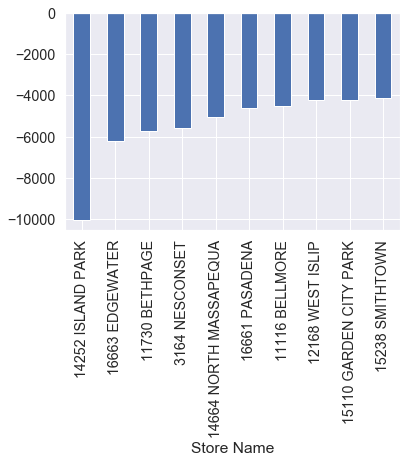

In [82]:
negative_gross_margin_by_store=negative_gross_margin.groupby(['Store Name']).sum()['Gross Margin'].sort_values().head(10)
negative_gross_margin_by_store.plot(kind='bar')
plt.show()

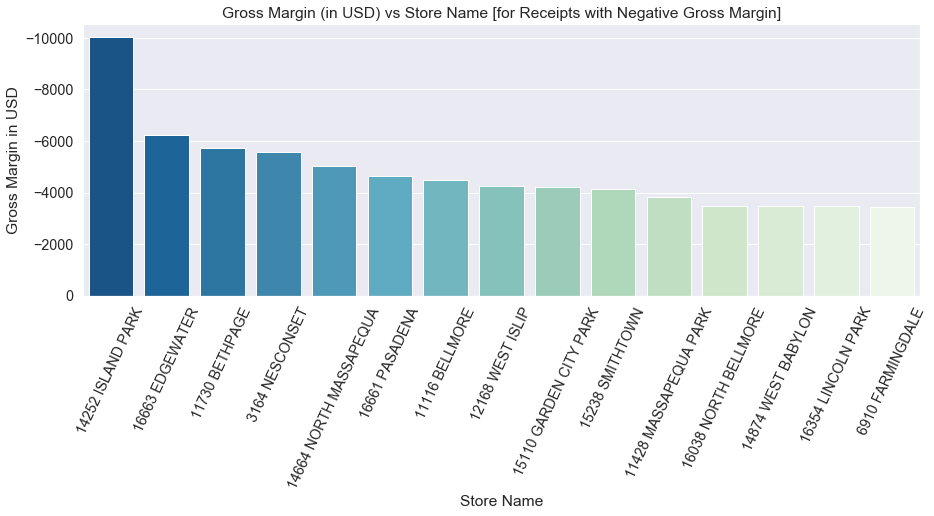

In [122]:
negative_gross_margins=pd.DataFrame()
negative_gross_margins['Gross Margin in USD'] = negative_gross_margin.groupby(['Store Name']).sum()['Gross Margin']
negative_gross_margins['Store Name'] = negative_gross_margins.index
group_top = negative_gross_margins.sort_values(by='Gross Margin in USD').head(15)

plt.figure(figsize=(15, 5))
sns.set(color_codes=True)
sns.set(font_scale = 1.3)
ax = sns.barplot(x="Store Name", y="Gross Margin in USD",palette='GnBu_r', data=group_top)
plt.ylim(reversed(plt.ylim()))
font_size= {'size': 'medium'}
ax.set_title("Gross Margin (in USD) vs Store Name [for Receipts with Negative Gross Margin]", **font_size)
xt = plt.xticks(rotation=65)

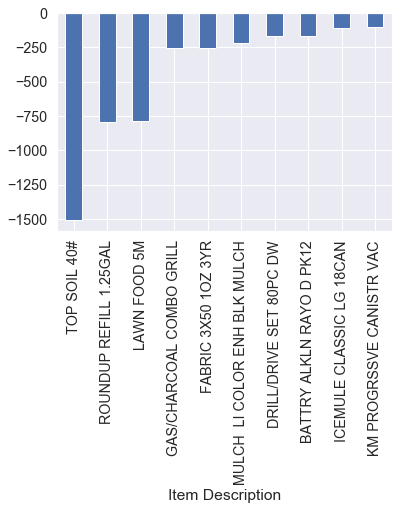

In [87]:
negative_gross_margin_islandpark_rows=negative_gross_margin[negative_gross_margin['Store Name']=='14252 ISLAND PARK']
#negative_gross_margin_islandpark=negative_gross_margin_by_store.ix[negative_gross_margin_islandpark_rows] 
negative_gross_margin_islandpark_rows.head(10)

negative_gross_margin_ispark=negative_gross_margin_islandpark_rows.groupby(['Item Description']).sum()['Gross Margin'].sort_values().head(10)
negative_gross_margin_ispark.plot(kind='bar')
plt.show()






negative_gross_marginispark=pd.DataFrame()
negative_gross_marginispark['Gross Margin in USD'] = negative_gross_margin_islandpark_rows.groupby(['Store Name']).sum()['Gross Margin']
negative_gross_marginispark['Item Description'] = negative_gross_marginispark.index
group_top = negative_gross_margins.sort_values(by='Gross Margin in USD').head(15)

plt.figure(figsize=(15, 5))
sns.set(color_codes=True)
sns.set(font_scale = 1.3)
ax = sns.barplot(x="tem Description", y="Gross Margin in USD",palette='GnBu_r', data=group_top)
plt.ylim(reversed(plt.ylim()))
font_size= {'size': 'medium'}
ax.set_title("Items selected by Island Park, to implement Loss Leadership Strategy", **font_size)
xt = plt.xticks(rotation=65)

In [128]:
negative_gross_margin_islandpark_rows.head(10)


,Unnamed: 0,Date,Transaction Time,Customer Number,Receipt Number,Store #,Store Name,Scanned UPC,Item Number,Item Description,...,$ Off Retail,Zip Code,Zip Plus-4,Loyalty ID,Clerk,Item Type,Line #,Line Item Transaction Type,Pricing Source,Return Code
1294,1294,4/1/2017,9:17:01,220204,X49640,B,14252 ISLAND PARK,46500164798,7198088,RAID ANT & ROACH LEMON,...,0.7,11558,2148,1.919255e+09,BARBARA NEGRON,Sale,1,Sale,Category Price Plan,NaN
1295,1295,4/1/2017,9:17:01,220204,X49640,B,14252 ISLAND PARK,46500816666,70725,RAID FLYING INSECT,...,0.7,11558,2148,1.919255e+09,BARBARA NEGRON,Sale,2,Sale,Category Price Plan,NaN
2305,2305,4/1/2017,9:50:02,286164,X49654,B,14252 ISLAND PARK,12800470488,3149184,BATTRY ALKLN RAYO D PK12,...,12.04,11572,4026,1.924332e+09,BRIANA SUDMANN,Sale,2,Sale,Promotion,NaN
2851,2851,4/1/2017,10:03:37,211868,X49661,B,14252 ISLAND PARK,99575260063,2392421,CM WRENCH 7PC ROLL METRC,...,12,11561,3010,1.916624e+09,GINA PLATANIA,Sale,1,Sale,Manual Override,NaN
4441,4441,4/1/2017,10:36:52,410162,X49678,B,14252 ISLAND PARK,39961000026,40395,"BALLCOCK ADJ 9-14""",...,0,11561,4305,1.941479e+09,BARBARA NEGRON,Sale,1,Sale,Retail,NaN
4523,4523,4/1/2017,10:39:15,233589,C13856,B,14252 ISLAND PARK,7.88604E+11,FA496787,WATER BOTTLE LI BEACH CHAIR,...,7.49,11561,4418,1.920156e+09,BARBARA NEGRON,Sale,1,Sale,Promotion,NaN
6022,6022,4/1/2017,11:05:59,202834,X49706,B,14252 ISLAND PARK,5.01085E+12,T1401219,SARDINES MUG,...,6.49,11561,2706,1.915494e+09,GINA PLATANIA,Sale,5,Sale,Promotion,NaN
10698,10698,4/1/2017,12:26:10,99996,56697,B,14252 ISLAND PARK,OTHER,2166718,INSPECTION MIRROR 2 X 3,...,9.41,NaN,NaN,NaN,GINA PEARSALL,Sale,1,Sale,Category Price Plan,NaN
10974,10974,4/1/2017,12:31:03,*80042,X49772,B,14252 ISLAND PARK,76174435245,2012383,"LEVEL 24"" FAT MAX",...,13,11570,2819,1.900736e+09,BARBARA NEGRON,Sale,1,Sale,Promotion,NaN
10975,10975,4/1/2017,12:31:03,*80042,X49772,B,14252 ISLAND PARK,76174435245,2012383,"LEVEL 24"" FAT MAX",...,13,11570,2819,1.900736e+09,BARBARA NEGRON,Sale,2,Sale,Promotion,NaN


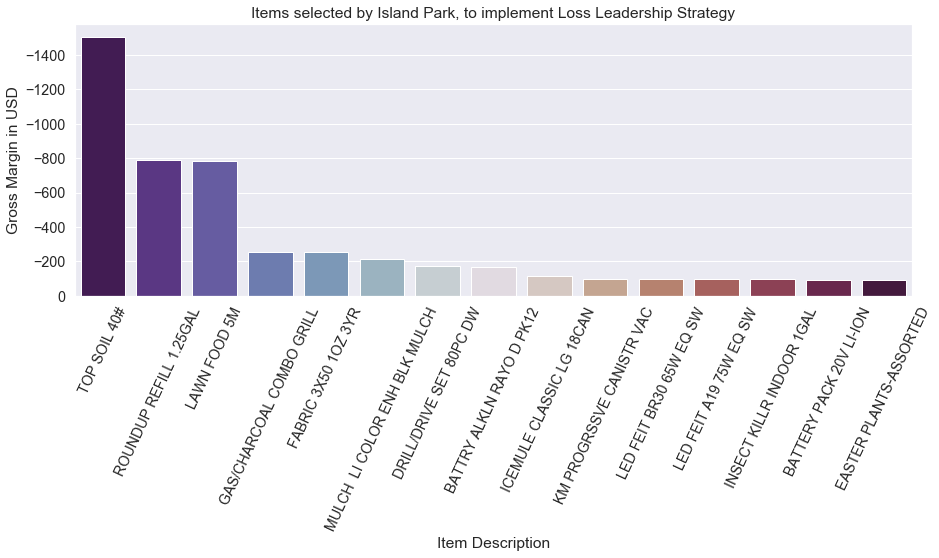

In [134]:
negative_gross_margin_islandpark_rows=negative_gross_margin[negative_gross_margin['Store Name']=='14252 ISLAND PARK']
negative_gross_marginispark=pd.DataFrame()
negative_gross_marginispark['Gross Margin in USD'] = negative_gross_margin_islandpark_rows.groupby(['Item Description']).sum()['Gross Margin']
negative_gross_marginispark['Item Description'] = negative_gross_marginispark.index
group_top = negative_gross_marginispark.sort_values(by='Gross Margin in USD').head(15)

plt.figure(figsize=(15, 5))
sns.set(color_codes=True)
sns.set(font_scale = 1.3)
ax = sns.barplot(x="Item Description", y="Gross Margin in USD",palette='twilight_shifted', data=group_top)
plt.ylim(reversed(plt.ylim()))
font_size= {'size': 'medium'}
ax.set_title("Items selected by Island Park, to implement Loss Leadership Strategy", **font_size)
xt = plt.xticks(rotation=65)

In [44]:
print(negative_gross_margin_sum_positive_by_receipt['Receipt Number'].unique().shape)
print(negative_gross_margin['Receipt Number'].unique().shape)

(13251,)
(17982,)


In [58]:
negative_gross_margin['Net Sales'] = negative_gross_margin['Net Sales'].replace(",","",regex=True).astype(float)
negative_gross_margin_sum_negative_by_receipt=negative_gross_margin.groupby(['Receipt Number','Store #']).filter(lambda s: s['Net Sales'].sum()<0)

In [56]:
negative_gross_margin_sum_negative_by_receipt.head(10)

,Unnamed: 0,Date,Transaction Time,Customer Number,Receipt Number,Store #,Store Name,Scanned UPC,Item Number,Item Description,...,$ Off Retail,Zip Code,Zip Plus-4,Loyalty ID,Clerk,Item Type,Line #,Line Item Transaction Type,Pricing Source,Return Code


Series([], Name: Store Name, dtype: object)

In [45]:
negative_gross_margin.head(20)

,Unnamed: 0,Date,Transaction Time,Customer Number,Receipt Number,Store #,Store Name,Scanned UPC,Item Number,Item Description,...,$ Off Retail,Zip Code,Zip Plus-4,Loyalty ID,Clerk,Item Type,Line #,Line Item Transaction Type,Pricing Source,Return Code
5,5,4/1/2017,7:16:09,99996,2815,S,16147 CALDWELL,OTHER,10529,SCRAPR RAZOR5BLADES ACE,...,4.12,NaN,NaN,NaN,GREGORY BOSSET,Sale,1,Sale,Category Price Plan,NaN
6,6,4/1/2017,7:16:09,99996,2815,S,16147 CALDWELL,OTHER,4547758,LAUNDRY FAUCET 2H CH OB,...,17.74,NaN,NaN,NaN,GREGORY BOSSET,Sale,2,Sale,Category Price Plan,NaN
44,44,4/1/2017,7:59:18,*5,E37840,L,15348 ROCKY POINT,28874031067,2090371,"BLADE SAW DEWALT 10""60",...,16,NaN,NaN,NaN,THOMAS KRAJEWSKI,Sale,1,Sale,Promotion,NaN
157,157,4/1/2017,8:13:36,536854,B35788,U,16354 LINCOLN PARK,32886263125,32243,WIRE 10/2 NMWG 25',...,14.99,7035,1616,1.942628e+09,CARLO REDA,Sale,2,Sale,Retail,NaN
270,270,4/1/2017,8:24:52,274368,I53962,J,15238 SMITHTOWN,OTHER,CMN,CMN DONATION,...,4,11787,2649,1.923212e+09,MARK WEBER,Sale,2,Sale,Manual Override,NaN
437,437,4/1/2017,8:34:59,*95761,J05239,3,3164 NESCONSET,OTHER,7123813,POTTING SOIL MIX MC 1CF,...,6,11767,2834,1.904519e+09,DAN BERGLUND,Sale,1,Sale,Manual Override,NaN
438,438,4/1/2017,8:35:32,1658,15282,I,15110 GARDEN CITY PARK,41294424646,13786,PINE SOL CLEANER 144OZ,...,1,11040,NaN,1.981734e+09,NYDIA ZACKSCHEWSKI,Sale,1,Sale,Category Price Plan,NaN
457,457,4/1/2017,8:36:35,181861,I60910,G,14874 WEST BABYLON,27426230057,17438,VARNISH POLY.5PT S-G MIN,...,0.95,11757,5406,1.913266e+09,AMBER KEICHER,Sale,2,Sale,Category Price Plan,NaN
619,619,4/1/2017,8:46:42,249713,I53968,J,15238 SMITHTOWN,32247175081,7206428,EZ SEED SUN&SHADE 3.75#,...,9,11787,1749,1.922222e+09,MARK WEBER,Sale,4,Sale,Manual Override,NaN
645,645,4/1/2017,8:47:54,*37301,F50884,6,11116 BELLMORE,70382133160,8025454,CARPOLSH MEGU DETAIL16OZ,...,0,11566,5317,1.900841e+09,MARIAN P,Sale,1,Sale,Retail,NaN


In [113]:
# Return Data Analysis
data_train['Gross Margin'] = data_train['Gross Margin'].replace(",","",regex=True).astype(float)
data_train['Net Sales'] = data_train['Net Sales'].replace(",","",regex=True).astype(float)
return_sales_rows=data_train.index[(data_train['Item Type']=='Return') & (data_train['Department Name']!='IN STORE COUPONS') & (data_train['Department Name']!='LIPA INSTANT REBATE')]
return_sales=data_train.ix[return_sales_rows]

In [114]:
return_sales.head(20)

,Unnamed: 0,Date,Transaction Time,Customer Number,Receipt Number,Store #,Store Name,Scanned UPC,Item Number,Item Description,...,$ Off Retail,Zip Code,Zip Plus-4,Loyalty ID,Clerk,Item Type,Line #,Line Item Transaction Type,Pricing Source,Return Code
2,2,4/1/2017,7:02:55,290074,D70801,O,15863 COPIAGUE,OTHER,IS117235,7158314 $20 INST SAVINGS,...,0,11717,8017,1.926165e+09,LISA JUDGE,Return,2,Return,Promotion,NaN
47,47,4/1/2017,7:59:39,330155,J05232,3,3164 NESCONSET,OTHER,IS117235,7158314 $20 INST SAVINGS,...,0,11749,5311,1.927094e+09,JUAN DIAZ,Return,2,Return,Promotion,NaN
93,93,4/1/2017,8:06:52,112889,F50870,6,11116 BELLMORE,OTHER,IS117237,7287154 $20 INST SAVINGS,...,0,11793,2629,1.927340e+09,MARIAN P,Return,7,Return,Promotion,NaN
127,127,4/1/2017,8:10:07,*AC2H9,I96357,Y,16663 EDGEWATER,OTHER,COUPON5,IN-STORE COUPON SAVE $5.00,...,0,21035,1330,1.928658e+09,SAMANTHA CROSBY,Return,6,Return,Retail,NaN
224,224,4/1/2017,8:20:45,*80179,C13709,B,14252 ISLAND PARK,OTHER,HBCZQTV6,HEATER QUARTZ TOWER-WHITE,...,0,11558,1601,1.900736e+09,GINA PLATANIA,Return,1,Return,Return Validation,W
230,230,4/1/2017,8:21:09,*66493,J28737,E,14664 NORTH MASSAPEQUA,OTHER,7437080,WBG MAX CRABGRASSRTU1GL,...,0,11783,2333,1.907423e+09,BRUNO LUNGHI,Return,1,Return,Return Validation,P
231,231,4/1/2017,8:21:09,*66493,J28737,E,14664 NORTH MASSAPEQUA,OTHER,7508070,INSECT KILLR INDOOR 1GAL,...,0,11783,2333,1.907423e+09,BRUNO LUNGHI,Return,3,Return,Return Validation,P
232,232,4/1/2017,8:21:09,*66493,J28737,E,14664 NORTH MASSAPEQUA,OTHER,7521420,CRABGRSS PREV+GREENUP 5M,...,0,11783,2333,1.907423e+09,BRUNO LUNGHI,Return,5,Return,Return Validation,P
263,263,4/1/2017,8:24:38,*956,F50877,6,11116 BELLMORE,OTHER,IS117237,7287154 $20 INST SAVINGS,...,0,11793,4119,1.979256e+09,MARIAN P,Return,3,Return,Promotion,NaN
304,304,4/1/2017,8:26:29,*5,I60909,G,14874 WEST BABYLON,OTHER,IS117237,7287154 $20 INST SAVINGS,...,0,NaN,NaN,NaN,AMBER KEICHER,Return,5,Return,Promotion,NaN


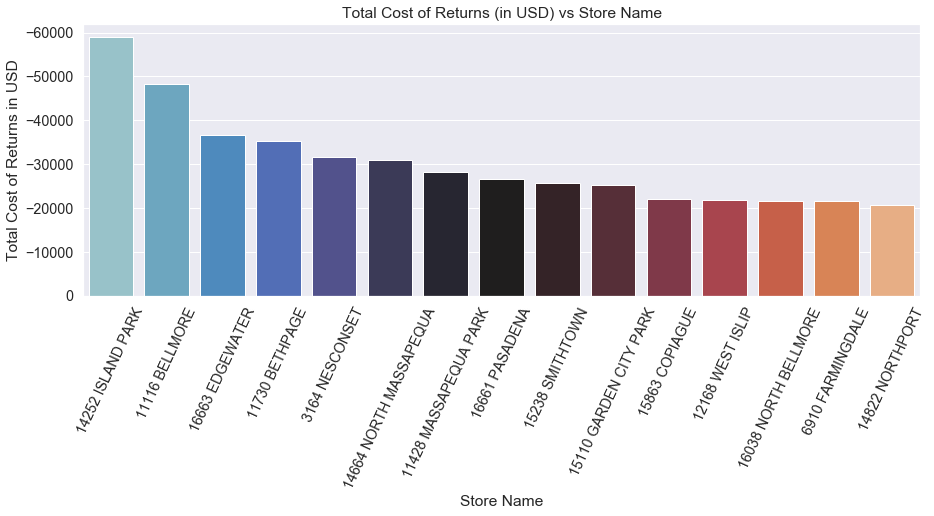

In [115]:
# Return Sales by Store Name
return_sales_analysis=pd.DataFrame()
return_sales_analysis['Total Cost of Returns in USD'] = return_sales.groupby(['Store Name']).sum()['Net Sales']
return_sales_analysis['Store Name'] = return_sales_analysis.index
group_top = return_sales_analysis.sort_values(by='Total Cost of Returns in USD').head(15)

plt.figure(figsize=(15, 5))
sns.set(color_codes=True)
sns.set(font_scale = 1.3)
ax = sns.barplot(x="Store Name", y="Total Cost of Returns in USD",palette='icefire', data=group_top)
plt.ylim(reversed(plt.ylim()))
font_size= {'size': 'medium'}
ax.set_title("Total Cost of Returns (in USD) vs Store Name", **font_size)
xt = plt.xticks(rotation=65)

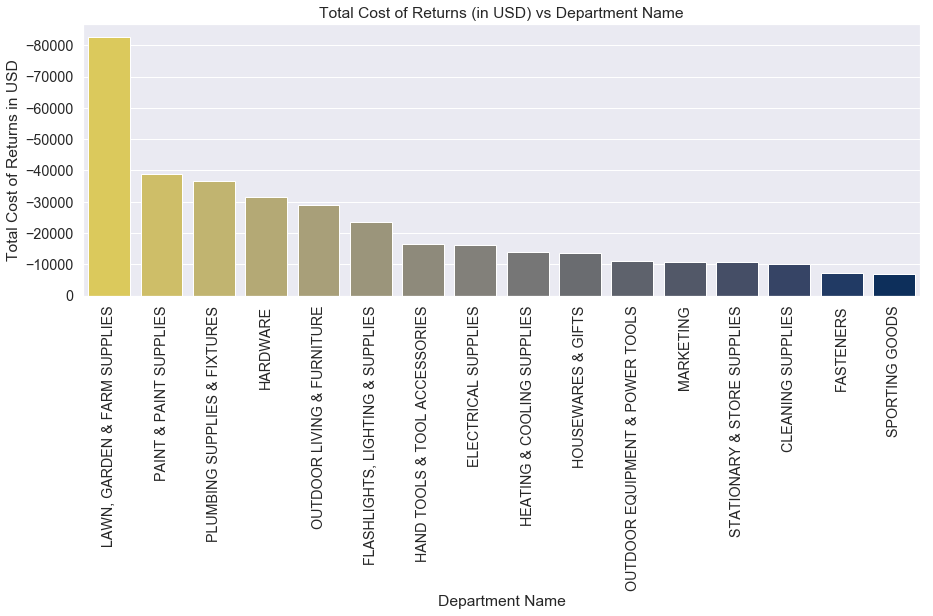

In [116]:
# Return Sales by Department
return_sales_analysis=pd.DataFrame()
return_sales_analysis['Total Cost of Returns in USD'] = return_sales.groupby(['Department Name']).sum()['Net Sales']
return_sales_analysis['Department Name'] = return_sales_analysis.index
group_top = return_sales_analysis.sort_values(by='Total Cost of Returns in USD').ix[1:17]

plt.figure(figsize=(15, 5))
sns.set(color_codes=True)
sns.set(font_scale = 1.3)
ax = sns.barplot(x="Department Name", y="Total Cost of Returns in USD",palette='cividis_r', data=group_top)
plt.ylim(reversed(plt.ylim()))
font_size= {'size': 'medium'}
ax.set_title("Total Cost of Returns (in USD) vs Department Name", **font_size)
xt = plt.xticks(rotation=90)

In [37]:
group_top.head(30)

,Unnamed: 0,Date,Transaction Time,Customer Number,Receipt Number,Store #,Store Name,Scanned UPC,Item Number,Item Description,...,Loyalty ID,Clerk,Item Type,Line #,Line Item Transaction Type,Pricing Source,Return Code,Total Cost of Returns in USD,Department Name_Right,Total Cost of Returns
337666,337666,4/12/2017,18:55:02,*25046,C25522,B,14252 ISLAND PARK,OTHER,IS117212,6187116 $3 INST SAVINGS,...,1.901146e+09,BRIANA SUDMANN,Return,7,Return,Promotion,NaN,-209585.0,ACE REWARDS INSTANT SAVINGS,NaN
631580,631580,4/22/2017,19:43:40,155054,I50037,I,15110 GARDEN CITY PARK,OTHER,IS117167,71928 $4 INST SAVINGS,...,1.911325e+09,TYLER ADAMS,Return,3,Return,Promotion,NaN,-209585.0,ACE REWARDS INSTANT SAVINGS,NaN
58751,58751,4/2/2017,15:46:26,271739,J06113,3,3164 NESCONSET,OTHER,IS117208,75307 $3 INST SAVINGS,...,1.922388e+09,ROBERT MARTIN,Return,3,Return,Promotion,NaN,-209585.0,ACE REWARDS INSTANT SAVINGS,NaN
631584,631584,4/22/2017,19:44:05,*5,J10266,Y,16663 EDGEWATER,OTHER,IS117156,2295061 $10 INST SAVINGS,...,NaN,SAMUEL BACHHUBER,Return,2,Return,Promotion,NaN,-209585.0,ACE REWARDS INSTANT SAVINGS,NaN
562765,562765,4/20/2017,18:41:10,380045,C36413,7,12168 WEST ISLIP,OTHER,IS117223,7206436 $7 INST SAVINGS,...,1.939137e+09,MATHEW FABER,Return,3,Return,Promotion,NaN,-209585.0,ACE REWARDS INSTANT SAVINGS,NaN


In [40]:
data_train['Gross Margin'] = data_train['Gross Margin'].replace(",","",regex=True).astype(float)
data_train['Net Sales'] = data_train['Net Sales'].replace(",","",regex=True).astype(float)
lgf_rows=data_train.index[(data_train['Item Type']=='Return') & (data_train['Department Name']=='LAWN, GARDEN & FARM SUPPLIES')]
lgf_sales=data_train.ix[lgf_rows]

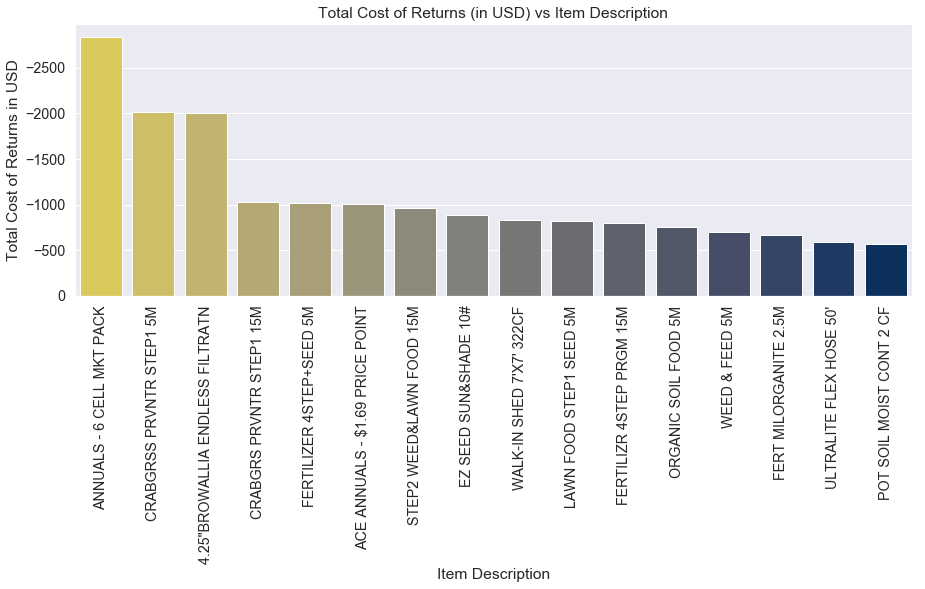

In [49]:
# Return Sales by Department
lgf_sales_analysis=pd.DataFrame()
lgf_sales_analysis['Total Cost of Returns in USD'] = lgf_sales.groupby(['Item Description']).sum()['Net Sales']
lgf_sales_analysis['Item Description'] = lgf_sales_analysis.index
group_top = lgf_sales_analysis.sort_values(by='Total Cost of Returns in USD').ix[1:17]

plt.figure(figsize=(15, 5))
sns.set(color_codes=True)
sns.set(font_scale = 1.3)
ax = sns.barplot(x="Item Description", y="Total Cost of Returns in USD",palette='cividis_r', data=group_top)
plt.ylim(reversed(plt.ylim()))
font_size= {'size': 'medium'}
ax.set_title("Total Cost of Returns (in USD) vs Item Description", **font_size)
xt = plt.xticks(rotation=90)

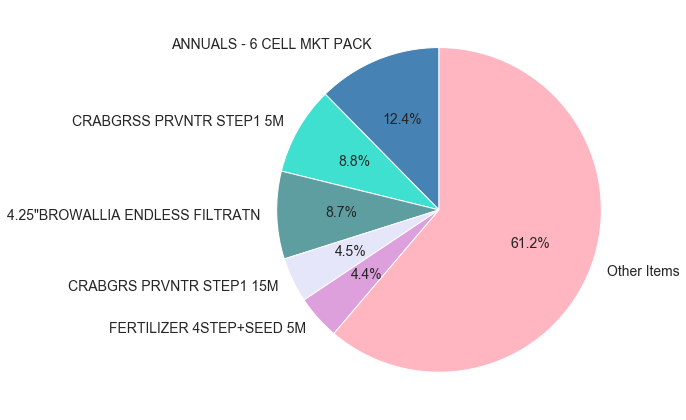

In [95]:
plt.figure(figsize=(16,8))
#group_top = lgf_sales_analysis.sort_values(by='Total Cost of Returns in USD').ix[1:6]
lgf_sales_analysis['Total Cost of Returns (positive) in USD'] = -1*lgf_sales_analysis['Total Cost of Returns in USD']
group_top = lgf_sales_analysis.sort_values(by='Total Cost of Returns in USD').ix[1:6]
other_top=lgf_sales_analysis.sort_values(by='Total Cost of Returns in USD')
others=pd.DataFrame(data={'Item Description':['Other Items'],'Total Cost of Returns (positive) in USD':[other_top['Total Cost of Returns (positive) in USD'][7:30].sum()]})
group_top2 = pd.concat([group_top,others])
colors = ['steelblue','turquoise','cadetblue','lavender','plum','lightpink']
# plot chart
ax1 = plt.subplot(121, aspect='equal')
group_top2.plot(kind='pie', y = 'Total Cost of Returns (positive) in USD', ax=ax1, autopct='%1.1f%%', 
 startangle=90, shadow=False, labels=group_top2['Item Description'], legend = False, colors=colors, fontsize=14)
ax1.axes.get_yaxis().set_visible(False)
plt.show()


In [69]:
others

,Item Description,Total Cost of Returns (positive) in USD
0,Other Items,65607.78


In [74]:
others=pd.DataFrame(data={'Item Description':['Other Items'],'Total Cost of Returns (positive) in USD':[other_top['Total Cost of Returns (positive) in USD'][7:].sum()]})

In [67]:
other_top=lgf_sales_analysis.sort_values(by='Total Cost of Returns in USD')